
   WSERV1: 

min Stetson for WSERV1: 2. V1: 274, V2: 222


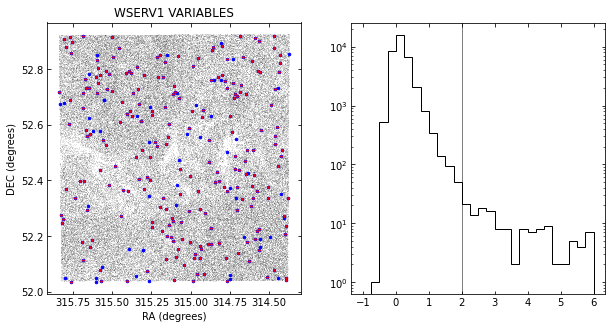


   WSERV5: 

min Stetson for WSERV5: 3. V1: 452, V2: 357


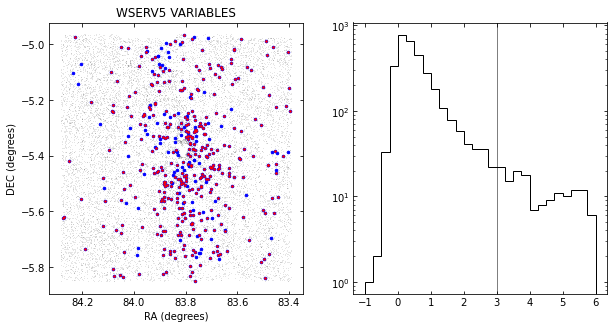


   WSERV7: 

min Stetson for WSERV7: 1.6. V1: 101, V2: 71


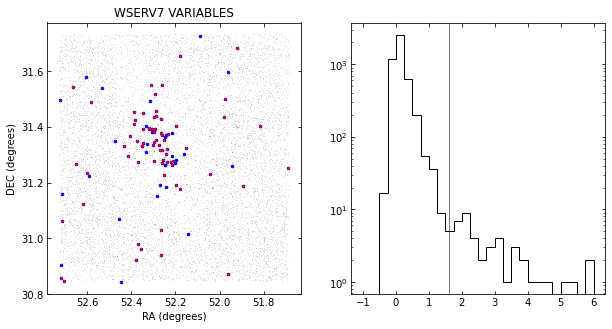


   WSERV8: 

min Stetson for WSERV8: 1.6. V1: 181, V2: 147


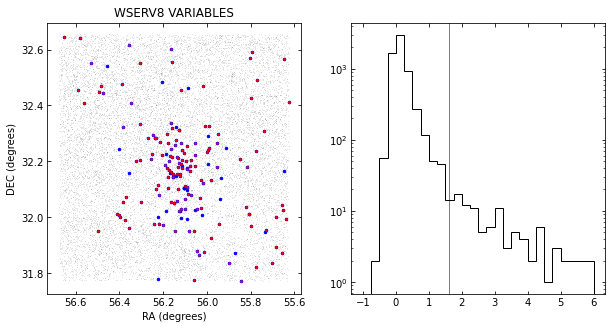


   WSERV11: 

min Stetson for WSERV11: 4. V1: 245, V2: 207


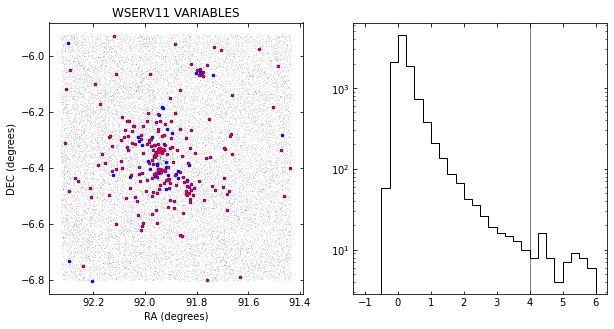

In [23]:
# maps

%run ../variability_selection.py

import matplotlib.pyplot as plt


spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]
min_Stetson_list = [2, 3, 1.6, 1.6, 4]

for wserv, n_obs, n_min, n_max, S in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list, min_Stetson_list)):
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    
    ds.loc[:, ('variability', 'Stetson_JHK')] *= (1/1.5)
    
#     q0 = select_q0_new(ds, n_obs)
#     q1 = select_q1_new(ds, n_obs)
#     q2 = select_q2_new(ds, n_obs)

#     print(f"New Q0 size: {np.sum(q0)}")
#     print(f"New Q1 size: {np.sum(q1)}")
#     print(f"New Q2 size: {np.sum(q2)}")

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v1 = sq1_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)
    
    print(f"min Stetson for WSERV{wserv}: {S}. V1: {np.sum(v1)}, V2: {np.sum(v2)}")
    
#     var = ds['variability']['Stetson_JHK'] > 2
    
    plt.figure(figsize=(10,5))
    
    plt.subplot(121)

    plt.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
    plt.plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'b.', ms=5)
    plt.plot(np.degrees(ds[v2]['mean']['RA']), np.degrees(ds[v2]['mean']['DEC']), 'r.', ms=3)    

    ax = plt.gca()

    ax.invert_xaxis()

    ax.set_xlabel("RA (degrees)")
    ax.set_ylabel("DEC (degrees)")
    ax.set_title(f"WSERV{wserv} VARIABLES")

#     ax.set_xlim(0, 5.5)
#     ax.set_ylim(19, 9)

    plt.subplot(122)
    ax = plt.gca()
    ax.set_yscale('log')
    ax.hist(ds[q2]['variability'][f'Stetson_JHK'], range=[-1,6], bins=28,  color='k', histtype='step')
    ax.axvline(S, color='k', lw=1, alpha=0.5)     
    
    plt.show()

WSERV1: 



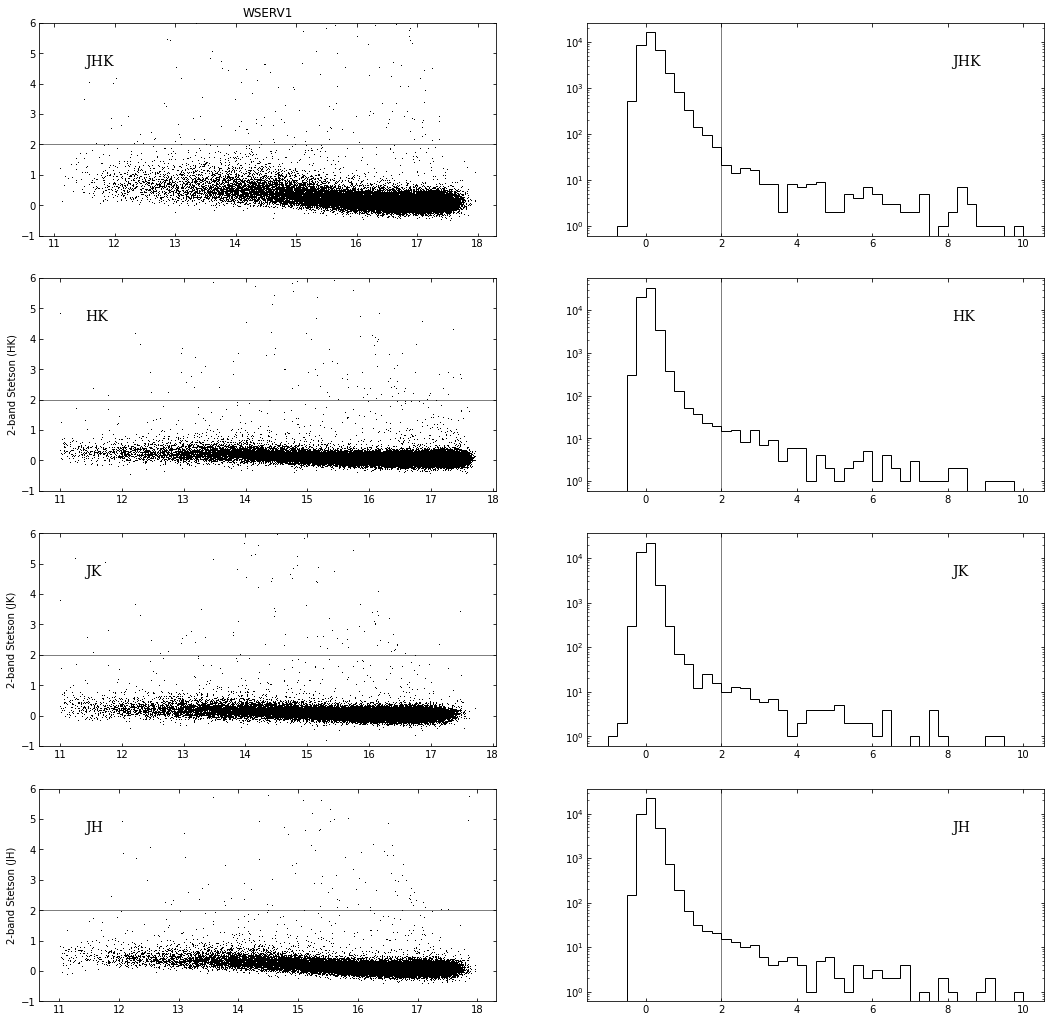

WSERV5: 



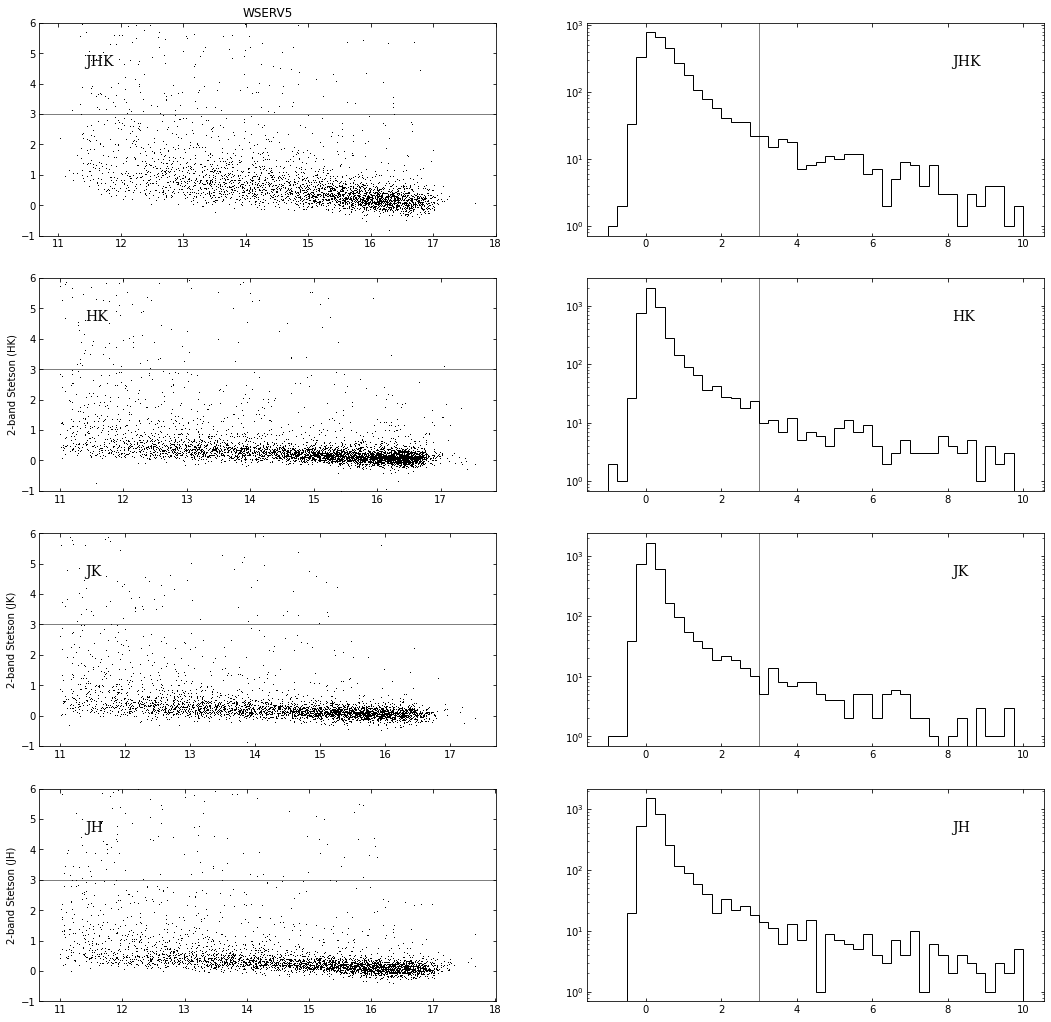

WSERV7: 



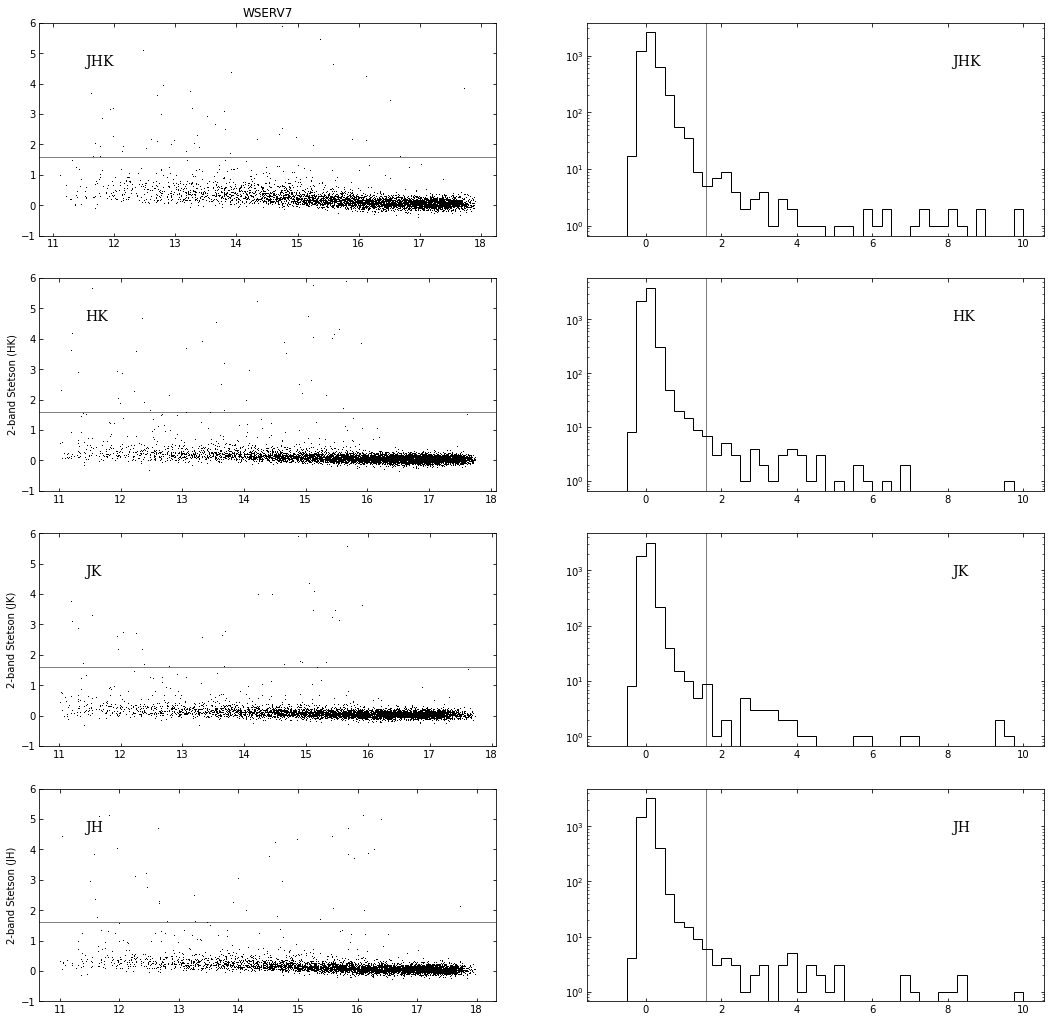

WSERV8: 



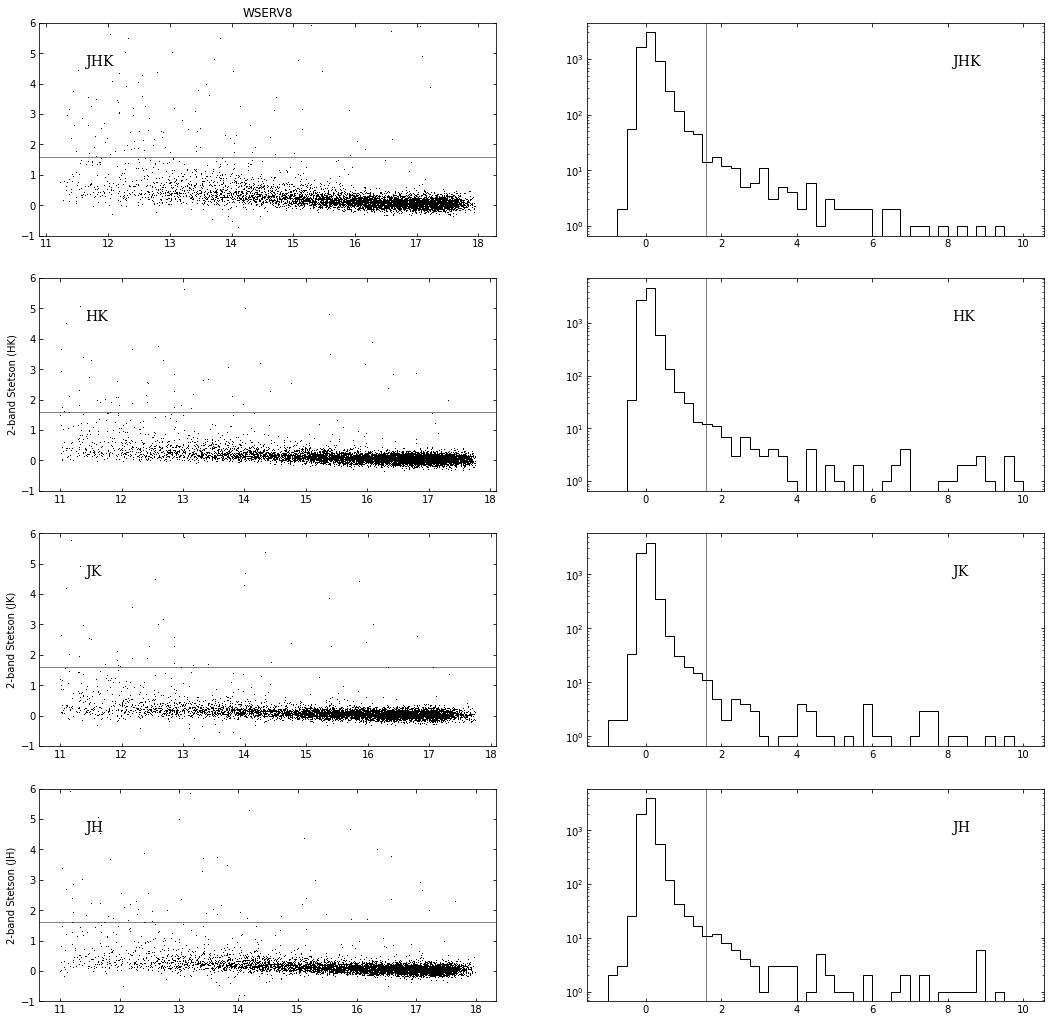

WSERV11: 



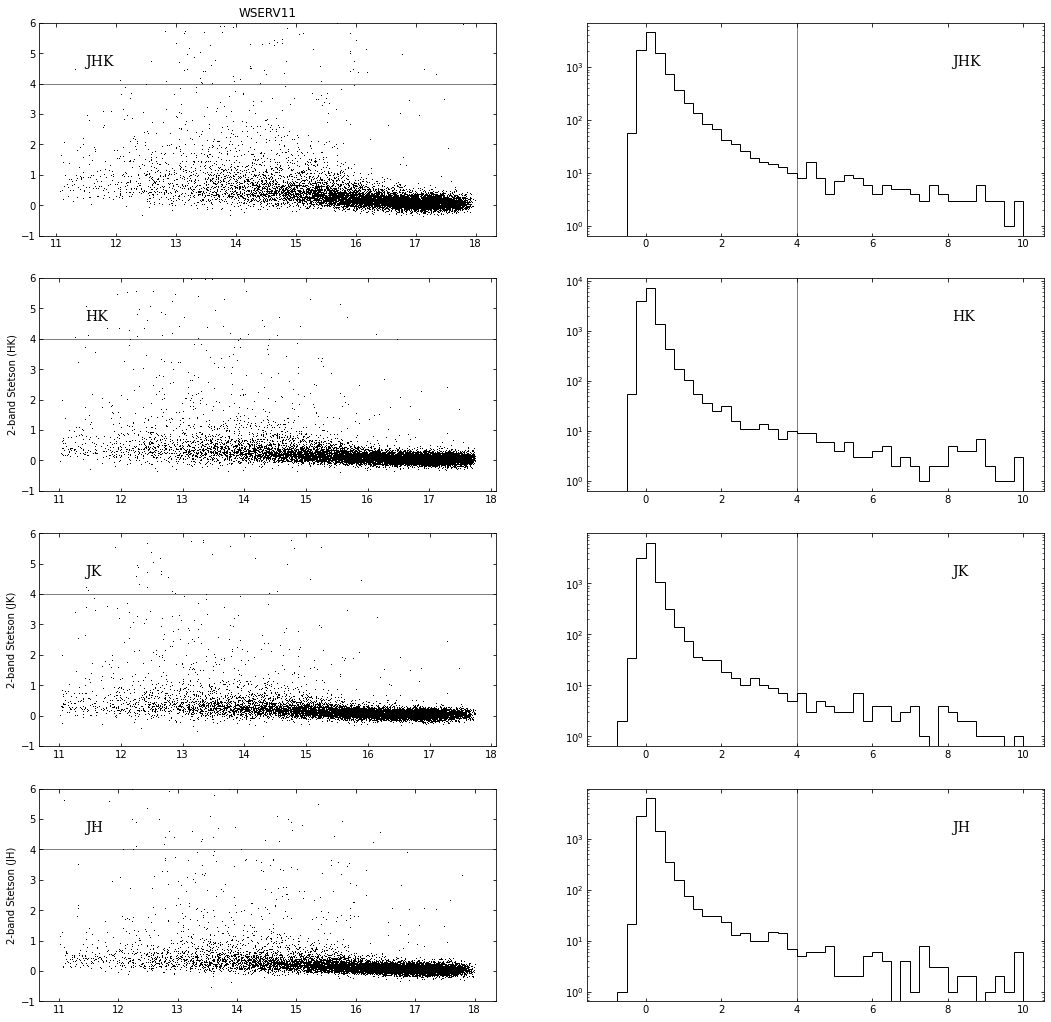

In [24]:
# Thing we need to do:

# plot chisq vs mag, sigma vs mag, and a histogram of chisq values (log y axis)

# maps

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

min_Stetson_list = [2, 3, 1.6, 1.6, 4]

for wserv, n_obs, n_min, n_max, S in list(zip(wserv_ids, n_obs_list, n_min_list, n_max_list, min_Stetson_list)):
    
    print(f"WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )
    
    ds = pd.read_hdf(spreadsheet_path, key='table')
    

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    q1_j = sq1_j(ds, n_min, n_max)
    q1_h = sq1_h(ds, n_min, n_max)
    q1_k = sq1_k(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max)
    v1 = sq1_variables(ds, n_min, n_max)
    v2 = sq2_variables(ds, n_min, n_max)

    fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(3*6, 6*3))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)

        
    bands = ["J", "H", "K"]
    q_by_band = {"J" : q1_j, "H": q1_h, "K": q1_k}
    q_by_band_excluded = {"J" : q1_h & q1_k, "H": q1_j & q1_k, "K": q1_j & q1_h}
    
    axes[0][0].set_title(f"WSERV{wserv}")
    
    axes[0][0].plot(ds[q2]['median']['HAPERMAG3'], ds[q2]['variability']['Stetson_JHK']/1.5, 'k,')
    axes[0][1].set_yscale('log')
    axes[0][1].hist(ds[q2]['variability']['Stetson_JHK']/1.5, range=[-1,10], bins=44,  color='k', histtype='step')
    
    axes[0][0].set_ylim(-1, 6)
    
    axes[0][0].text(0.1, 0.8, f"JHK", fontsize=14, family='serif', transform=axes[0][0].transAxes)
    axes[0][1].text(0.8, 0.8, f"JHK", fontsize=14, family='serif', transform=axes[0][1].transAxes)

    axes[0][0].axhline(S, color='k', lw=1, alpha=0.5)
    axes[0][1].axvline(S, color='k', lw=1, alpha=0.5)

    for ax, band in zip(axes[1:], bands):
        
        
        band_pair = "JHK".replace(band, '')
         
        qb = q_by_band_excluded[band]
        ax[0].plot(ds[qb]['median'][f'{band_pair[-1]}APERMAG3'], ds[qb]['variability'][f'Stetson_{band_pair}'], 'k,')
#         ax[1].plot(ds[qb]['median'][f'{band_pair[-1]}APERMAG3'], ds[qb]['std'][f'{band_pair}APERMAG3'], 'k,')
        
        ax[1].set_yscale('log')
        ax[1].hist(ds[qb]['variability'][f'Stetson_{band_pair}'], range=[-1,10], bins=44,  color='k', histtype='step')
        

        ax[0].set_ylim(-1, 6)
#         ax[1].set_ylim(0, 0.25)
        
        ax[0].text(0.1, 0.8, f"{band_pair}", fontsize=14, family='serif', transform=ax[0].transAxes)
        ax[1].text(0.8, 0.8, f"{band_pair}", fontsize=14, family='serif', transform=ax[1].transAxes)
        
        ax[0].axhline(S, color='k', lw=1, alpha=0.5)
        ax[1].axvline(S, color='k', lw=1, alpha=0.5)
        

        ax[0].set_ylabel(f"2-band Stetson ({band_pair})")
#         ax[0].set_xlabel(f"median magnitude")

#     ax[1].set_ylabel("Observed rms")
#     ax[1].set_xlabel("median magnitude")

#     ax[2].set_ylabel("N")
#     ax[2].set_xlabel(r"$\chi^2_\nu$")
    plt.show()
    